In [1]:
!ls

drive  sample_data


In [2]:
# To change the directory
%cd drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [3]:
!ls

 01_Fires_from_Space_Australia		     Datasets	      PlantVillage
 01_Simple_image_classification.ipynb	    'Deep Learning'   Projects
 02_Classification_on_the_credit_g_dataset   email_class


In [4]:
%cd Deep\ Learning

/content/drive/MyDrive/Colab Notebooks/Deep Learning


In [5]:
! mkdir youtube_learning

mkdir: cannot create directory ‘youtube_learning’: File exists


In [6]:
%cd youtube_learning/
! mkdir Nicholas_Renotte

/content/drive/MyDrive/Colab Notebooks/Deep Learning/youtube_learning
mkdir: cannot create directory ‘Nicholas_Renotte’: File exists


In [7]:
!ls
%cd Nicholas_Renotte

Nicholas_Renotte
/content/drive/MyDrive/Colab Notebooks/Deep Learning/youtube_learning/Nicholas_Renotte


In [8]:
! git clone https://github.com/nicknochnack/ImageClassification

fatal: destination path 'ImageClassification' already exists and is not an empty directory.


In [9]:
! ls

ImageClassification


In [10]:
import tensorflow as tf
import os

In [11]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [12]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [17]:
%cd ImageClassification/

/content/drive/MyDrive/Colab Notebooks/Deep Learning/youtube_learning/Nicholas_Renotte/ImageClassification


In [18]:
# 2. Remove dodgy images
import cv2
import imghdr

In [19]:
data_dir = 'data'

In [20]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [21]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [22]:
# 3. Load Data
import numpy as np
from matplotlib import pyplot as plt

In [23]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [24]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [25]:
batch = data_iterator.next()
batch

(array([[[[239.       , 220.       , 190.       ],
          [239.       , 220.       , 190.       ],
          [239.42969  , 220.42969  , 190.42969  ],
          ...,
          [251.       , 233.       , 193.       ],
          [251.       , 233.       , 193.       ],
          [251.       , 233.       , 193.       ]],
 
         [[239.       , 220.       , 190.       ],
          [239.12488  , 220.12488  , 190.12488  ],
          [239.70593  , 220.70593  , 190.70593  ],
          ...,
          [251.       , 233.       , 193.       ],
          [251.       , 233.       , 193.       ],
          [251.       , 233.       , 193.       ]],
 
         [[239.14062  , 220.14062  , 190.14062  ],
          [239.36218  , 220.36218  , 190.36218  ],
          [240.06042  , 221.06042  , 191.06042  ],
          ...,
          [251.14062  , 233.14062  , 193.14062  ],
          [251.14062  , 233.14062  , 193.14062  ],
          [251.14062  , 233.14062  , 193.14062  ]],
 
         ...,
 
         [[ 

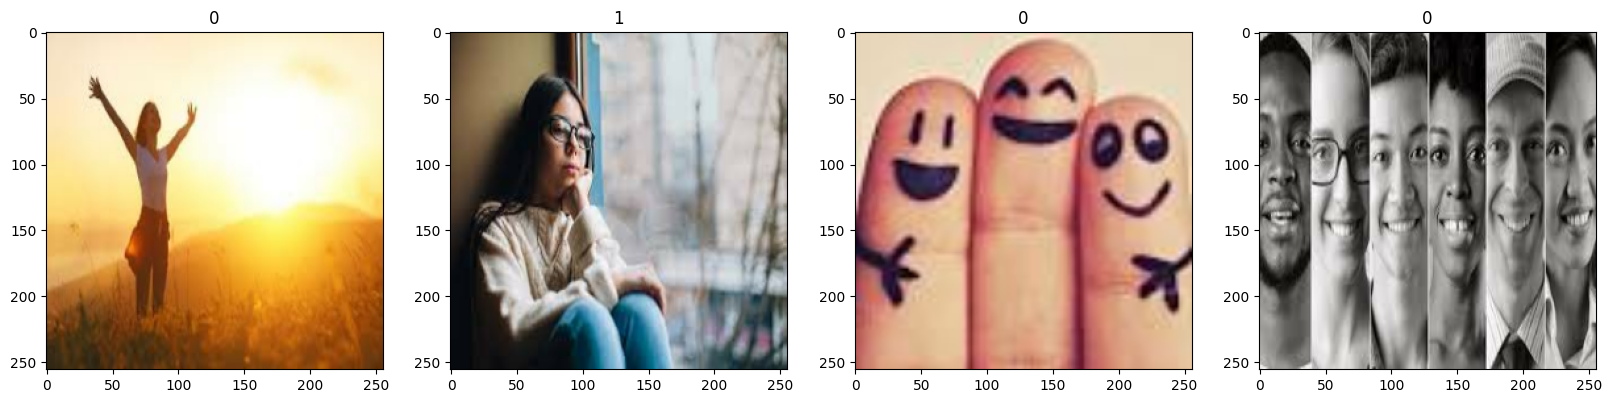

In [26]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [27]:
# 4. Scale Data
data = data.map(lambda x,y: (x/255, y))

In [28]:
data.as_numpy_iterator().next()

(array([[[[1.03707109e-02, 1.75076589e-01, 2.36979172e-01],
          [4.65379916e-02, 2.07452506e-01, 2.63618261e-01],
          [9.73881707e-02, 2.52435654e-01, 3.00727636e-01],
          ...,
          [1.29411772e-01, 2.70879298e-01, 3.43282789e-01],
          [1.18780635e-01, 2.50719965e-01, 3.25229794e-01],
          [3.90249699e-01, 5.02159953e-01, 5.83670318e-01]],
 
         [[4.91268374e-02, 2.13832721e-01, 2.72590488e-01],
          [8.41586813e-02, 2.45640919e-01, 3.00103515e-01],
          [1.32621020e-01, 2.86591560e-01, 3.33383381e-01],
          ...,
          [1.34696692e-01, 2.76164204e-01, 3.48567694e-01],
          [1.25259489e-01, 2.54810989e-01, 3.30514699e-01],
          [3.94151449e-01, 5.05683184e-01, 5.87382853e-01]],
 
         [[1.05296329e-01, 2.69358814e-01, 3.23548287e-01],
          [1.38441563e-01, 2.99976498e-01, 3.51375103e-01],
          [1.83194563e-01, 3.35546881e-01, 3.80004913e-01],
          ...,
          [1.43106624e-01, 2.84723043e-01, 3.5633

In [29]:
# 5. Split Data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [30]:
train_size

7

In [31]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [32]:
# 6. Build Deep Learning Model
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [34]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [37]:
# 7. Train
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 17s 552ms/step - loss: 1.1719 - accuracy: 0.4911 - val_loss: 0.6249 - val_accuracy: 0.5312
Epoch 2/20
7/7 [==============================] - 9s 909ms/step - loss: 0.6371 - accuracy: 0.5625 - val_loss: 0.5806 - val_accuracy: 0.5312
Epoch 3/20
7/7 [==============================] - 8s 910ms/step - loss: 0.5916 - accuracy: 0.7545 - val_loss: 0.6265 - val_accuracy: 0.5938
Epoch 4/20
7/7 [==============================] - 12s 934ms/step - loss: 0.6070 - accuracy: 0.6339 - val_loss: 0.6093 - val_accuracy: 0.7344
Epoch 5/20
7/7 [==============================] - 7s 731ms/step - loss: 0.5448 - accuracy: 0.7812 - val_loss: 0.4688 - val_accuracy: 0.7344
Epoch 6/20
7/7 [==============================] - 6s 526ms/step - loss: 0.4204 - accuracy: 0.8214 - val_loss: 0.2541 - val_accuracy: 0.9375
Epoch 7/20
7/7 [==============================] - 9s 644ms/step - loss: 0.4059 - accuracy: 0.8259 - val_loss: 0.6811 - val_accuracy: 0.6250
Epoch 8/20
7/7 [==

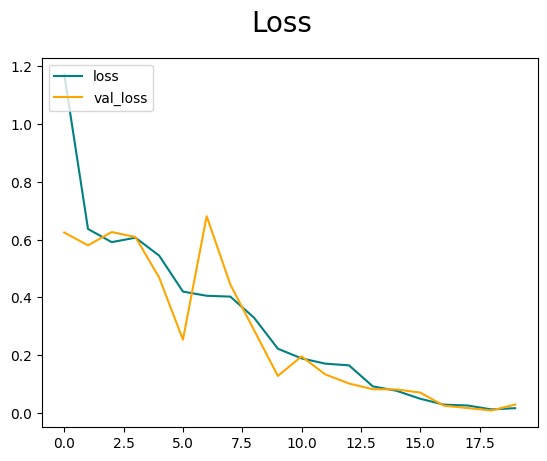

In [38]:
# 8. Plot Performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

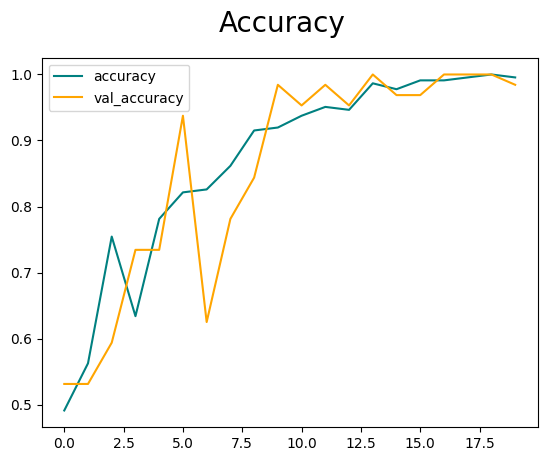

In [39]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [40]:
# 9. Evaluate
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 327ms/step


In [41]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


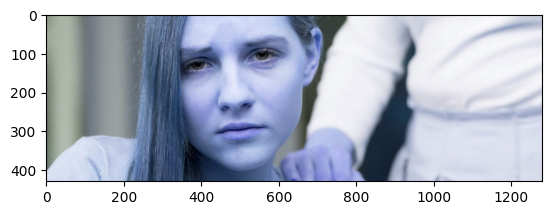

In [48]:
# 10. Test
import cv2
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Deep Learning/youtube_learning/Nicholas_Renotte/ImageClassification/data/sad/51079685_M-1280x429.jpg')
plt.imshow(img)
plt.show()

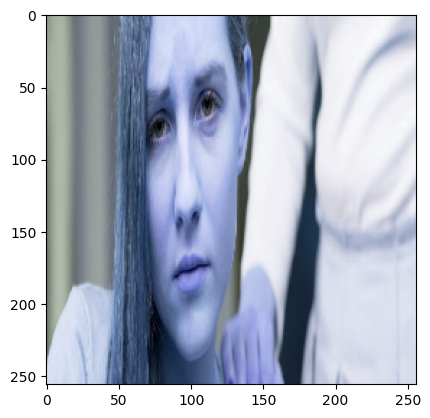

In [49]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [50]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 18ms/step


array([[0.99953926]], dtype=float32)

In [51]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [53]:
# 11. Save the Model
from tensorflow.keras.models import load_model

In [55]:
model.save(os.path.join('models','imageclassifier.h5'))

In [57]:
%cd model

 154006829.jpg	 8iAb9k4aT.jpg	 data  'Getting Started.ipynb'	 logs   models


In [58]:
new_model = load_model('models/imageclassifier.h5')

In [59]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 277ms/step


array([[0.99953926]], dtype=float32)